VISUALIZACIÓN: LDPTrace - Original vs Perturbada
Trayectoria original creada con 13 puntos
Dataset de entrenamiento: 26 trayectorias
Entrenando modelo LDPTrace...
Generando trayectorias sintéticas...
Trayectorias sintéticas generadas: 1

Estadísticas comparativas:
Original - Longitud: 13
Sintéticas - Longitudes: [10]


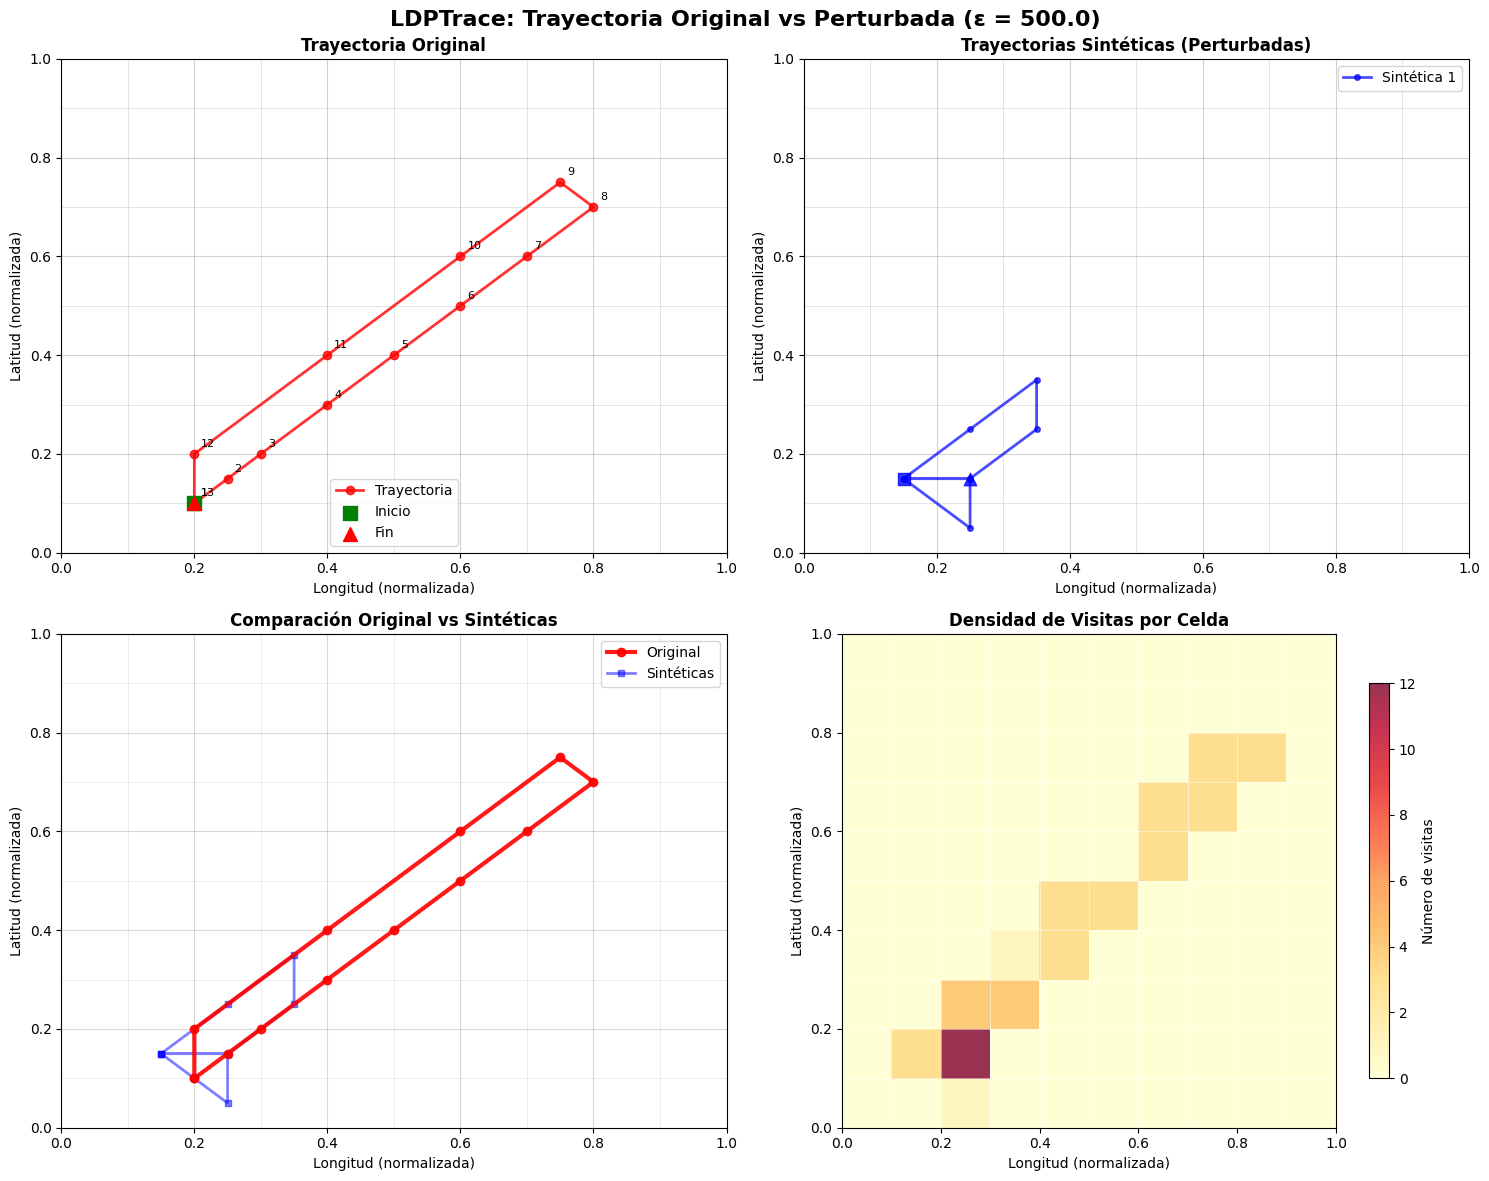


COMPARACIÓN DE NIVELES DE PRIVACIDAD


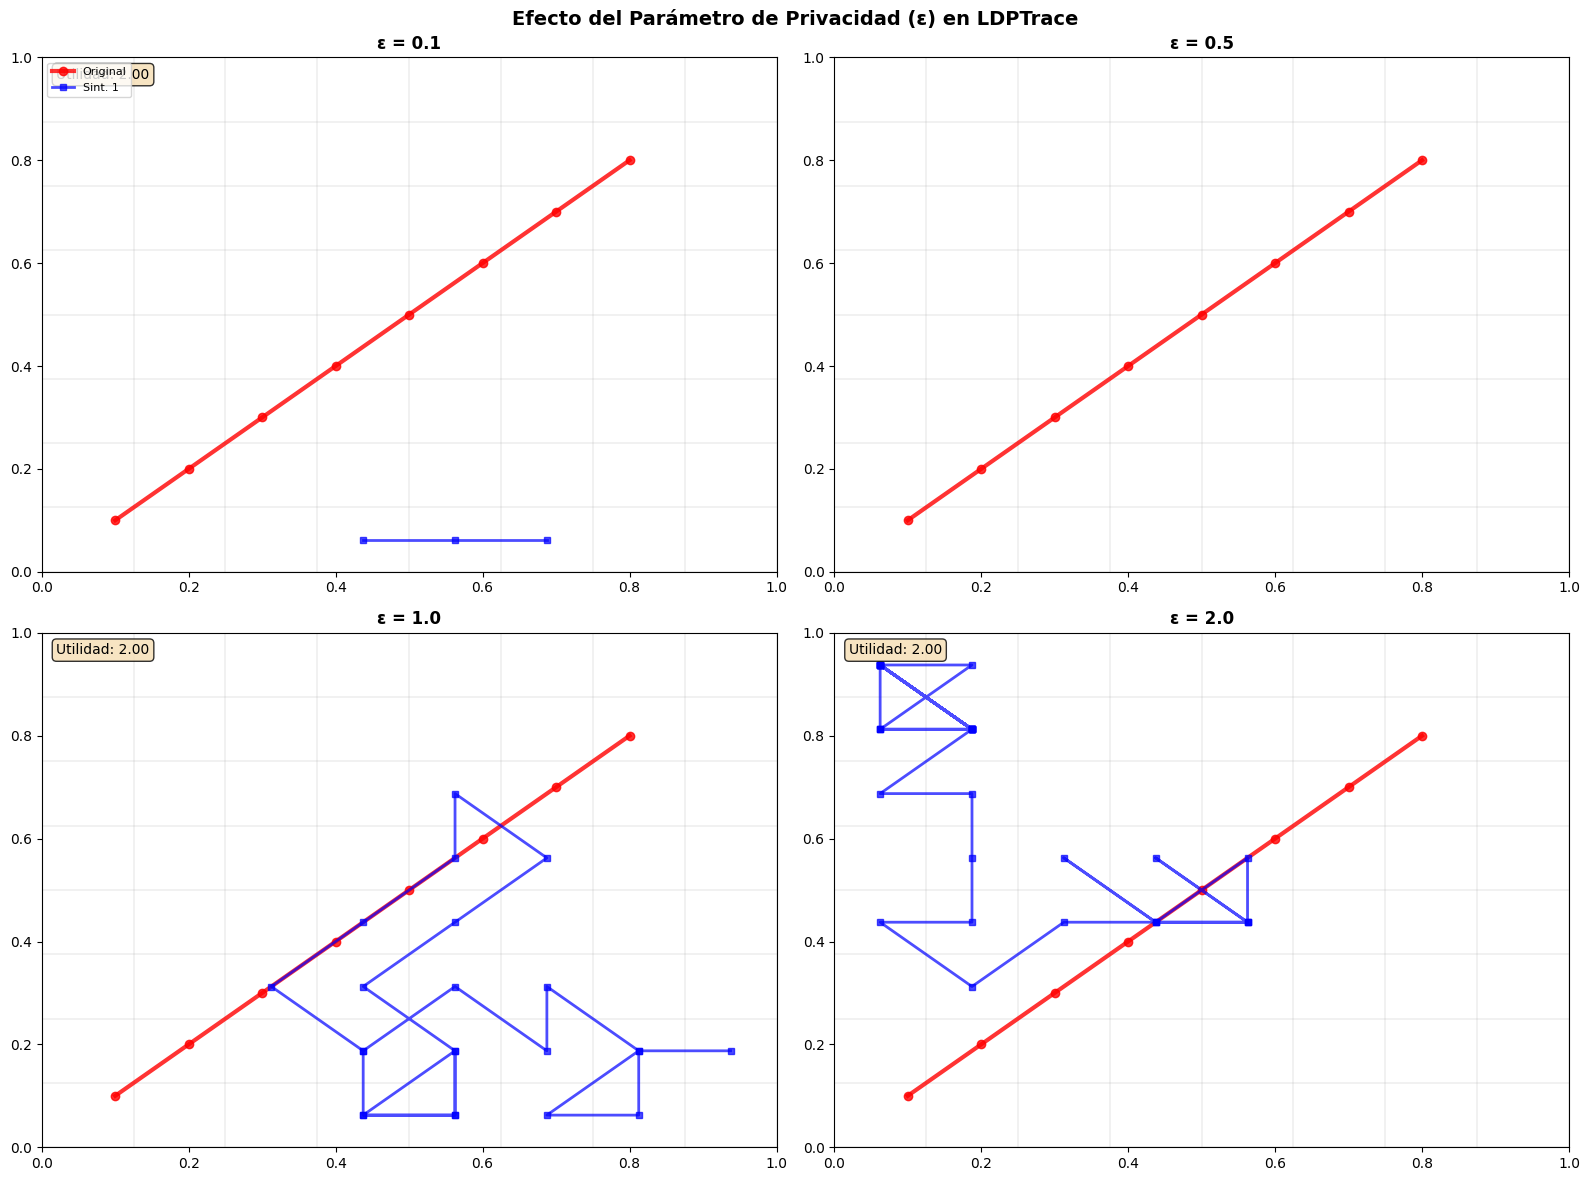


ANÁLISIS ADICIONAL

Métricas de utilidad:
Distancia promedio puntos de inicio: 0.071
Desviación estándar inicio: 0.000
Longitud original: 13
Longitudes sintéticas (promedio): 10.0
Rango longitudes sintéticas: 10-10
Puntos de inicio únicos: 1
Puntos de fin únicos: 1

La visualización muestra cómo LDPTrace:
1. Preserva patrones generales de movilidad
2. Introduce variabilidad para proteger privacidad
3. Genera trayectorias geográficamente plausibles
4. Balancea utilidad vs privacidad según el parámetro ε


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
from collections import defaultdict, Counter
from typing import List, Tuple, Dict, Optional
import math

# Importar la clase LDPTrace (asume que ya está disponible)
# from ldptrace_implementation import LDPTrace

class LDPTraceVisualizer:
    """
    Clase para visualizar trayectorias originales vs perturbadas con LDPTrace
    """
    
    def __init__(self, grid_size: int = 10):
        self.grid_size = grid_size
        
    def plot_trajectory_comparison(self, original_trajectory: List[Tuple[float, float]], 
                                 synthetic_trajectories: List[List[Tuple[float, float]]],
                                 grid_size: int = 10, epsilon: float = 1.0):
        """
        Visualiza la trayectoria original vs las trayectorias sintéticas
        """
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'LDPTrace: Trayectoria Original vs Perturbada (ε = {epsilon})', 
                     fontsize=16, fontweight='bold')
        
        # 1. Trayectoria original con grilla
        ax1 = axes[0, 0]
        self._plot_single_trajectory_with_grid(ax1, original_trajectory, grid_size, 
                                             'Trayectoria Original', 'red', 'o')
        
        # 2. Trayectorias sintéticas
        ax2 = axes[0, 1]
        self._plot_multiple_trajectories_with_grid(ax2, synthetic_trajectories, grid_size,
                                                 'Trayectorias Sintéticas (Perturbadas)', 
                                                 ['blue', 'green', 'orange', 'purple', 'brown'])
        
        # 3. Comparación superpuesta
        ax3 = axes[1, 0]
        self._plot_overlaid_trajectories(ax3, original_trajectory, synthetic_trajectories, 
                                       grid_size, 'Comparación Original vs Sintéticas')
        
        # 4. Mapa de calor de densidad de celdas
        ax4 = axes[1, 1]
        self._plot_cell_density_heatmap(ax4, original_trajectory, synthetic_trajectories, 
                                       grid_size, 'Densidad de Visitas por Celda')
        
        plt.tight_layout()
        plt.show()
        
    def _plot_single_trajectory_with_grid(self, ax, trajectory, grid_size, title, color, marker):
        """Grafica una sola trayectoria con grilla"""
        # Dibujar grilla
        self._draw_grid(ax, grid_size)
        
        # Extraer coordenadas
        if not trajectory:
            return
            
        x_coords = [point[1] for point in trajectory]  # longitud
        y_coords = [point[0] for point in trajectory]  # latitud
        
        # Graficar trayectoria
        ax.plot(x_coords, y_coords, color=color, linewidth=2, marker=marker, 
                markersize=6, alpha=0.8, label='Trayectoria')
        
        # Marcar inicio y fin
        if len(trajectory) > 0:
            ax.scatter(x_coords[0], y_coords[0], color='green', s=100, 
                      marker='s', label='Inicio', zorder=5)
            ax.scatter(x_coords[-1], y_coords[-1], color='red', s=100, 
                      marker='^', label='Fin', zorder=5)
        
        # Numerar puntos
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(str(i+1), (x, y), xytext=(5, 5), 
                       textcoords='offset points', fontsize=8)
        
        ax.set_title(title, fontweight='bold')
        ax.set_xlabel('Longitud (normalizada)')
        ax.set_ylabel('Latitud (normalizada)')
        ax.legend()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        
    def _plot_multiple_trajectories_with_grid(self, ax, trajectories, grid_size, title, colors):
        """Grafica múltiples trayectorias sintéticas"""
        # Dibujar grilla
        self._draw_grid(ax, grid_size)
        
        # Graficar cada trayectoria sintética
        for i, trajectory in enumerate(trajectories[:5]):  # Máximo 5 trayectorias
            if not trajectory:
                continue
                
            x_coords = [point[1] for point in trajectory]
            y_coords = [point[0] for point in trajectory]
            
            color = colors[i % len(colors)]
            ax.plot(x_coords, y_coords, color=color, linewidth=2, 
                   marker='o', markersize=4, alpha=0.7, 
                   label=f'Sintética {i+1}')
            
            # Marcar inicio y fin
            if len(trajectory) > 0:
                ax.scatter(x_coords[0], y_coords[0], color=color, s=80, 
                          marker='s', alpha=0.8, zorder=3)
                ax.scatter(x_coords[-1], y_coords[-1], color=color, s=80, 
                          marker='^', alpha=0.8, zorder=3)
        
        ax.set_title(title, fontweight='bold')
        ax.set_xlabel('Longitud (normalizada)')
        ax.set_ylabel('Latitud (normalizada)')
        ax.legend()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        
    def _plot_overlaid_trajectories(self, ax, original, synthetics, grid_size, title):
        """Superpone trayectoria original con sintéticas"""
        # Dibujar grilla ligera
        self._draw_grid(ax, grid_size, alpha=0.2)
        
        # Trayectoria original
        if original:
            x_orig = [point[1] for point in original]
            y_orig = [point[0] for point in original]
            ax.plot(x_orig, y_orig, color='red', linewidth=3, 
                   marker='o', markersize=6, alpha=0.9, 
                   label='Original', zorder=4)
        
        # Trayectorias sintéticas con transparencia
        for i, trajectory in enumerate(synthetics[:3]):
            if not trajectory:
                continue
                
            x_coords = [point[1] for point in trajectory]
            y_coords = [point[0] for point in trajectory]
            
            ax.plot(x_coords, y_coords, color='blue', linewidth=2, 
                   marker='s', markersize=4, alpha=0.5, 
                   label='Sintéticas' if i == 0 else "", zorder=2)
        
        ax.set_title(title, fontweight='bold')
        ax.set_xlabel('Longitud (normalizada)')
        ax.set_ylabel('Latitud (normalizada)')
        ax.legend()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        
    def _plot_cell_density_heatmap(self, ax, original, synthetics, grid_size, title):
        """Crea mapa de calor de densidad de celdas visitadas"""
        # Crear matriz de densidad
        density_matrix = np.zeros((grid_size, grid_size))
        
        # Función para convertir coordenadas a celda
        def coord_to_cell(lat, lon):
            row = min(int(lat * grid_size), grid_size - 1)
            col = min(int(lon * grid_size), grid_size - 1)
            return row, col
        
        # Contar visitas de trayectoria original (peso mayor)
        if original:
            for lat, lon in original:
                row, col = coord_to_cell(lat, lon)
                density_matrix[row, col] += 3  # Peso mayor para original
        
        # Contar visitas de trayectorias sintéticas
        for trajectory in synthetics:
            for lat, lon in trajectory:
                row, col = coord_to_cell(lat, lon)
                density_matrix[row, col] += 1
        
        # Crear mapa de calor
        im = ax.imshow(density_matrix, cmap='YlOrRd', origin='lower', 
                      extent=[0, 1, 0, 1], alpha=0.8)
        
        # Añadir líneas de grilla
        for i in range(grid_size + 1):
            ax.axhline(i / grid_size, color='white', linewidth=0.5, alpha=0.7)
            ax.axvline(i / grid_size, color='white', linewidth=0.5, alpha=0.7)
        
        # Colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('Número de visitas')
        
        ax.set_title(title, fontweight='bold')
        ax.set_xlabel('Longitud (normalizada)')
        ax.set_ylabel('Latitud (normalizada)')
        
    def _draw_grid(self, ax, grid_size, alpha=0.3):
        """Dibuja grilla en el plot"""
        for i in range(grid_size + 1):
            ax.axhline(i / grid_size, color='gray', linewidth=0.5, alpha=alpha)
            ax.axvline(i / grid_size, color='gray', linewidth=0.5, alpha=alpha)

def demonstrate_ldptrace_visualization():
    """
    Función principal de demostración con visualización
    """
    print("=" * 60)
    print("VISUALIZACIÓN: LDPTrace - Original vs Perturbada")
    print("=" * 60)
    
    # Parámetros
    epsilon = 500.0
    grid_size = 10
    
    # Crear trayectoria original realista
    original_trajectory = [
        (0.1, 0.2),   # Casa
        (0.15, 0.25), # Calle
        (0.2, 0.3),   # Intersección
        (0.3, 0.4),   # Avenida principal
        (0.4, 0.5),   # Centro comercial
        (0.5, 0.6),   # Parque
        (0.6, 0.7),   # Zona de oficinas
        (0.7, 0.8),   # Trabajo
        (0.75, 0.75), # Regreso - restaurant
        (0.6, 0.6),   # Parque (regreso)
        (0.4, 0.4),   # Centro (regreso)
        (0.2, 0.2),   # Cerca de casa
        (0.1, 0.2)    # Casa
    ]
    
    print(f"Trayectoria original creada con {len(original_trajectory)} puntos")
    
    # Crear dataset de entrenamiento
    training_trajectories = [original_trajectory]
    
    # Generar variaciones de la trayectoria original
    for i in range(25):
        varied_traj = []
        for lat, lon in original_trajectory:
            # Añadir variación gaussiana
            new_lat = max(0, min(1, lat + random.gauss(0, 0.03)))
            new_lon = max(0, min(1, lon + random.gauss(0, 0.03)))
            varied_traj.append((new_lat, new_lon))
        
        # Ocasionalmente modificar longitud
        if random.random() < 0.2:
            if len(varied_traj) > 5:
                # Remover algunos puntos
                points_to_remove = random.randint(1, 3)
                for _ in range(points_to_remove):
                    if len(varied_traj) > 5:
                        varied_traj.pop(random.randint(1, len(varied_traj)-2))
        
        if random.random() < 0.15:
            # Añadir puntos intermedios
            for _ in range(2):
                if len(varied_traj) > 2:
                    idx = random.randint(1, len(varied_traj)-1)
                    prev_lat, prev_lon = varied_traj[idx-1]
                    curr_lat, curr_lon = varied_traj[idx]
                    mid_lat = (prev_lat + curr_lat) / 2
                    mid_lon = (prev_lon + curr_lon) / 2
                    varied_traj.insert(idx, (mid_lat, mid_lon))
        
        training_trajectories.append(varied_traj)
    
    print(f"Dataset de entrenamiento: {len(training_trajectories)} trayectorias")
    
    # Entrenar LDPTrace
    print("Entrenando modelo LDPTrace...")
    ldp_trace = LDPTrace(epsilon=epsilon, grid_size=grid_size)
    ldp_trace.train(training_trajectories)
    
    # Generar trayectorias sintéticas
    print("Generando trayectorias sintéticas...")
    synthetic_cell_trajectories = ldp_trace.synthesize_trajectories(1)
    
    # Convertir celdas a coordenadas
    synthetic_trajectories = []
    for cell_traj in synthetic_cell_trajectories:
        coords = ldp_trace.cells_to_coordinates(cell_traj)
        if len(coords) > 2:  # Solo trayectorias no triviales
            synthetic_trajectories.append(coords)
    
    print(f"Trayectorias sintéticas generadas: {len(synthetic_trajectories)}")
    
    # Mostrar estadísticas
    print("\nEstadísticas comparativas:")
    print(f"Original - Longitud: {len(original_trajectory)}")
    print("Sintéticas - Longitudes:", [len(traj) for traj in synthetic_trajectories[:5]])
    
    # Visualizar
    visualizer = LDPTraceVisualizer(grid_size)
    visualizer.plot_trajectory_comparison(original_trajectory, synthetic_trajectories, 
                                        grid_size, epsilon)
    
    return original_trajectory, synthetic_trajectories

def compare_privacy_levels():
    """
    Compara diferentes niveles de privacidad (epsilon)
    """
    print("\n" + "=" * 60)
    print("COMPARACIÓN DE NIVELES DE PRIVACIDAD")
    print("=" * 60)
    
    # Trayectoria base
    base_trajectory = [
        (0.1, 0.1), (0.2, 0.2), (0.3, 0.3), (0.4, 0.4),
        (0.5, 0.5), (0.6, 0.6), (0.7, 0.7), (0.8, 0.8)
    ]
    
    # Diferentes valores de epsilon
    epsilons = [0.1, 0.5, 1.0, 2.0]
    grid_size = 8
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, eps in enumerate(epsilons):
        # Crear dataset de entrenamiento
        training_data = [base_trajectory]
        for _ in range(15):
            varied = [(max(0, min(1, lat + random.gauss(0, 0.04))),
                      max(0, min(1, lon + random.gauss(0, 0.04))))
                     for lat, lon in base_trajectory]
            training_data.append(varied)
        
        # Entrenar modelo
        ldp_trace = LDPTrace(epsilon=eps, grid_size=grid_size)
        ldp_trace.train(training_data)
        
        # Generar sintéticas
        synthetic_cells = ldp_trace.synthesize_trajectories(1)
        synthetic_coords = [ldp_trace.cells_to_coordinates(cells) 
                           for cells in synthetic_cells if len(cells) > 2]
        
        # Graficar
        ax = axes[i]
        
        # Grilla
        for j in range(grid_size + 1):
            ax.axhline(j / grid_size, color='gray', linewidth=0.3, alpha=0.5)
            ax.axvline(j / grid_size, color='gray', linewidth=0.3, alpha=0.5)
        
        # Original
        x_orig = [p[1] for p in base_trajectory]
        y_orig = [p[0] for p in base_trajectory]
        ax.plot(x_orig, y_orig, 'ro-', linewidth=3, markersize=6, 
               label='Original', alpha=0.8)
        
        # Sintéticas
        colors = ['blue', 'green', 'orange', 'purple', 'brown']
        for j, traj in enumerate(synthetic_coords[:5]):
            if traj:
                x_syn = [p[1] for p in traj]
                y_syn = [p[0] for p in traj]
                ax.plot(x_syn, y_syn, color=colors[j % len(colors)], 
                       marker='s', linewidth=2, markersize=4, alpha=0.7,
                       label=f'Sint. {j+1}' if j < 2 else "")
        
        ax.set_title(f'ε = {eps}', fontweight='bold', fontsize=12)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        if i == 0:
            ax.legend(loc='upper left', fontsize=8)
        
        # Calcular utilidad (similitud promedio)
        if synthetic_coords:
            avg_similarity = np.mean([
                1 / (1 + np.mean([
                    ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
                    for p1, p2 in zip(base_trajectory, traj)
                ]) if len(traj) == len(base_trajectory) else 0.5)
                for traj in synthetic_coords[:3]
            ])
            ax.text(0.02, 0.98, f'Utilidad: {avg_similarity:.2f}', 
                   transform=ax.transAxes, fontsize=10, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('Efecto del Parámetro de Privacidad (ε) en LDPTrace', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Importar LDPTrace (necesario para ejecución)
import sys
import os

# Aquí incluimos la definición completa de LDPTrace para que funcione independientemente
class LDPTrace:
    """
    LDPTrace: Local Differential Privacy for Trajectory Synthesis
    """
    
    def __init__(self, epsilon: float, grid_size: int, alpha: float = 0.1, beta: float = 0.01):
        self.epsilon = epsilon
        self.grid_size = grid_size
        self.num_cells = grid_size * grid_size
        self.alpha = alpha
        self.beta = beta
        
        self.epsilon1 = epsilon / 3
        self.epsilon2 = epsilon / 3
        self.epsilon3 = epsilon / 3
        
        self.virtual_start = self.num_cells
        self.virtual_end = self.num_cells + 1
        
        self.length_distribution = None
        self.mobility_model = None
    
    def discretize_trajectory(self, trajectory: List[Tuple[float, float]]) -> List[int]:
        discretized = []
        for lat, lon in trajectory:
            row = min(int(lat * self.grid_size), self.grid_size - 1)
            col = min(int(lon * self.grid_size), self.grid_size - 1)
            cell_id = row * self.grid_size + col
            discretized.append(cell_id)
        
        result = []
        for i, cell in enumerate(discretized):
            if i == 0 or cell != discretized[i-1]:
                result.append(cell)
        return result
    
    def get_adjacent_cells(self, cell_id: int) -> List[int]:
        if cell_id >= self.num_cells:
            return list(range(self.num_cells))
        
        row = cell_id // self.grid_size
        col = cell_id % self.grid_size
        
        adjacent = []
        for dr in [-1, 0, 1]:
            for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0:
                    continue
                new_row, new_col = row + dr, col + dc
                if 0 <= new_row < self.grid_size and 0 <= new_col < self.grid_size:
                    adjacent.append(new_row * self.grid_size + new_col)
        return adjacent
    
    def oue_encode(self, value: int, domain_size: int) -> np.ndarray:
        vector = np.zeros(domain_size, dtype=int)
        if 0 <= value < domain_size:
            vector[value] = 1
        return vector
    
    def oue_perturb(self, vector: np.ndarray, epsilon: float) -> np.ndarray:
        perturbed = np.zeros_like(vector)
        q = 1 / (np.exp(epsilon) + 1)
        
        for i in range(len(vector)):
            if vector[i] == 1:
                perturbed[i] = 1 if random.random() < 0.5 else 0
            else:
                perturbed[i] = 1 if random.random() < q else 0
        return perturbed
    
    def oue_aggregate(self, perturbed_vectors: List[np.ndarray], epsilon: float) -> np.ndarray:
        n = len(perturbed_vectors)
        if n == 0:
            return np.array([])
        
        domain_size = len(perturbed_vectors[0])
        g_hat = np.sum(perturbed_vectors, axis=0)
        
        q = 1 / (np.exp(epsilon) + 1)
        g_tilde = (g_hat - n * q) / (0.5 - q)
        g_tilde = np.maximum(g_tilde, 0)
        return g_tilde
    
    def collect_length_distribution(self, trajectories: List[List[int]]) -> Dict[int, float]:
        perturbed_vectors = []
        
        for trajectory in trajectories:
            length = len(trajectory)
            length_vector = self.oue_encode(length, self.num_cells + 1)
            perturbed_vector = self.oue_perturb(length_vector, self.epsilon1)
            perturbed_vectors.append(perturbed_vector)
        
        estimated_counts = self.oue_aggregate(perturbed_vectors, self.epsilon1)
        total_count = np.sum(estimated_counts)
        if total_count == 0:
            total_count = 1
        
        length_dist = {}
        for length, count in enumerate(estimated_counts):
            if count > 0:
                length_dist[length] = count / total_count
        return length_dist
    
    def collect_intra_transitions(self, trajectories: List[List[int]], k_quantile: float = 0.8) -> Dict[Tuple[int, int], float]:
        lengths = [len(traj) for traj in trajectories]
        Lk = int(np.quantile(lengths, k_quantile)) if lengths else 1
        Lk = max(1, Lk)
        
        transition_domain_size = 8 * self.num_cells
        perturbed_vectors = []
        
        for trajectory in trajectories:
            transitions = []
            for i in range(len(trajectory) - 1):
                curr_cell = trajectory[i]
                next_cell = trajectory[i + 1]
                if next_cell in self.get_adjacent_cells(curr_cell):
                    state_idx = curr_cell * 8 + self.get_adjacent_cells(curr_cell).index(next_cell)
                    transitions.append(state_idx)
            
            transitions = transitions[:Lk]
            
            for i in range(Lk):
                if i < len(transitions):
                    trans_vector = self.oue_encode(transitions[i], transition_domain_size)
                else:
                    trans_vector = np.zeros(transition_domain_size, dtype=int)
                
                budget_per_transition = self.epsilon2 / Lk
                perturbed_vector = self.oue_perturb(trans_vector, budget_per_transition)
                perturbed_vectors.append(perturbed_vector)
        
        estimated_counts = self.oue_aggregate(perturbed_vectors, self.epsilon2 / Lk)
        
        transition_counts = defaultdict(float)
        for state_idx, count in enumerate(estimated_counts):
            if count > 0:
                from_cell = state_idx // 8
                adj_idx = state_idx % 8
                if from_cell < self.num_cells:
                    adjacent_cells = self.get_adjacent_cells(from_cell)
                    if adj_idx < len(adjacent_cells):
                        to_cell = adjacent_cells[adj_idx]
                        transition_counts[(from_cell, to_cell)] = count
        
        return dict(transition_counts)
    
    def collect_begin_end_transitions(self, trajectories: List[List[int]]) -> Tuple[Dict[int, float], Dict[int, float]]:
        begin_vectors = []
        end_vectors = []
        
        for trajectory in trajectories:
            if len(trajectory) > 0:
                begin_cell = trajectory[0]
                begin_vector = self.oue_encode(begin_cell, self.num_cells)
                perturbed_begin = self.oue_perturb(begin_vector, self.epsilon3)
                begin_vectors.append(perturbed_begin)
                
                end_cell = trajectory[-1]
                end_vector = self.oue_encode(end_cell, self.num_cells)
                perturbed_end = self.oue_perturb(end_vector, self.epsilon3)
                end_vectors.append(perturbed_end)
        
        begin_counts = self.oue_aggregate(begin_vectors, self.epsilon3)
        end_counts = self.oue_aggregate(end_vectors, self.epsilon3)
        
        begin_dist = {}
        end_dist = {}
        
        total_begin = np.sum(begin_counts) if len(begin_counts) > 0 else 1
        total_end = np.sum(end_counts) if len(end_counts) > 0 else 1
        
        for cell, count in enumerate(begin_counts):
            if count > 0:
                begin_dist[cell] = count / total_begin
        
        for cell, count in enumerate(end_counts):
            if count > 0:
                end_dist[cell] = count / total_end
        
        return begin_dist, end_dist
    
    def build_mobility_model(self, intra_transitions: Dict[Tuple[int, int], float], 
                           begin_dist: Dict[int, float], end_dist: Dict[int, float]) -> Dict[Tuple[int, int], float]:
        mobility_model = {}
        
        for cell, prob in begin_dist.items():
            mobility_model[(self.virtual_start, cell)] = prob
        
        for (from_cell, to_cell), count in intra_transitions.items():
            mobility_model[(from_cell, to_cell)] = count
        
        for cell, prob in end_dist.items():
            mobility_model[(cell, self.virtual_end)] = prob
        
        cell_totals = defaultdict(float)
        for (from_cell, to_cell), count in mobility_model.items():
            cell_totals[from_cell] += count
        
        normalized_model = {}
        for (from_cell, to_cell), count in mobility_model.items():
            if cell_totals[from_cell] > 0:
                normalized_model[(from_cell, to_cell)] = count / cell_totals[from_cell]
            else:
                normalized_model[(from_cell, to_cell)] = 0
        
        return normalized_model
    
    def train(self, trajectories: List[List[Tuple[float, float]]]):
        discretized_trajectories = []
        for traj in trajectories:
            discretized = self.discretize_trajectory(traj)
            if len(discretized) > 0:
                discretized_trajectories.append(discretized)
        
        self.length_distribution = self.collect_length_distribution(discretized_trajectories)
        intra_transitions = self.collect_intra_transitions(discretized_trajectories)
        begin_dist, end_dist = self.collect_begin_end_transitions(discretized_trajectories)
        self.mobility_model = self.build_mobility_model(intra_transitions, begin_dist, end_dist)
    
    def sample_length(self) -> int:
        if not self.length_distribution or sum(self.length_distribution.values()) == 0:
            return random.randint(2, 10)
        
        lengths = list(self.length_distribution.keys())
        probabilities = list(self.length_distribution.values())
        total_prob = sum(probabilities)
        if total_prob == 0:
            return random.choice(lengths) if lengths else 5
        
        probabilities = [p / total_prob for p in probabilities]
        return np.random.choice(lengths, p=probabilities)
    
    def get_next_cell_probabilities(self, current_cell: int, current_length: int) -> Dict[int, float]:
        probabilities = {}
        possible_next = self.get_adjacent_cells(current_cell) + [self.virtual_end]
        
        for next_cell in possible_next:
            if (current_cell, next_cell) in self.mobility_model:
                prob = self.mobility_model[(current_cell, next_cell)]
                if next_cell == self.virtual_end:
                    prob = (self.alpha + self.beta * current_length) * prob
                probabilities[next_cell] = prob
        return probabilities
    
    def synthesize_trajectory(self) -> List[int]:
        if not self.mobility_model:
            raise ValueError("Model not trained. Call train() first.")
        
        target_length = self.sample_length()
        
        start_probs = {}
        for (from_cell, to_cell), prob in self.mobility_model.items():
            if from_cell == self.virtual_start:
                start_probs[to_cell] = prob
        
        if not start_probs:
            start_cell = random.randint(0, self.num_cells - 1)
        else:
            cells = list(start_probs.keys())
            probs = list(start_probs.values())
            total_prob = sum(probs)
            if total_prob > 0:
                probs = [p / total_prob for p in probs]
                start_cell = np.random.choice(cells, p=probs)
            else:
                start_cell = random.choice(cells)
        
        trajectory = [start_cell]
        current_cell = start_cell
        
        for length in range(2, target_length + 1):
            next_probs = self.get_next_cell_probabilities(current_cell, length)
            
            if not next_probs:
                break
            
            total_prob = sum(next_probs.values())
            if total_prob == 0:
                break
            
            cells = list(next_probs.keys())
            probs = [next_probs[cell] / total_prob for cell in cells]
            
            next_cell = np.random.choice(cells, p=probs)
            
            if next_cell == self.virtual_end:
                break
            
            trajectory.append(next_cell)
            current_cell = next_cell
        
        return trajectory
    
    def synthesize_trajectories(self, num_trajectories: int) -> List[List[int]]:
        synthetic_trajectories = []
        
        for i in range(num_trajectories):
            try:
                traj = self.synthesize_trajectory()
                if len(traj) > 1:
                    synthetic_trajectories.append(traj)
            except Exception as e:
                continue
        
        return synthetic_trajectories
    
    def cells_to_coordinates(self, trajectory: List[int]) -> List[Tuple[float, float]]:
        coordinates = []
        for cell in trajectory:
            if cell < self.num_cells:
                row = cell // self.grid_size
                col = cell % self.grid_size
                lat = (row + 0.5) / self.grid_size
                lon = (col + 0.5) / self.grid_size
                coordinates.append((lat, lon))
        return coordinates


if __name__ == "__main__":
    # Ejecutar demostración principal
    original_traj, synthetic_trajs = demonstrate_ldptrace_visualization()
    
    # Ejecutar comparación de niveles de privacidad
    compare_privacy_levels()
    
    print("\n" + "=" * 60)
    print("ANÁLISIS ADICIONAL")
    print("=" * 60)
    
    # Análisis de métricas de utilidad
    print("\nMétricas de utilidad:")
    
    if original_traj and synthetic_trajs:
        # Distancias promedio entre puntos de inicio
        start_distances = []
        for synth in synthetic_trajs[:5]:
            if synth:
                dist = ((original_traj[0][0] - synth[0][0])**2 + 
                       (original_traj[0][1] - synth[0][1])**2)**0.5
                start_distances.append(dist)
        
        if start_distances:
            print(f"Distancia promedio puntos de inicio: {np.mean(start_distances):.3f}")
            print(f"Desviación estándar inicio: {np.std(start_distances):.3f}")
        
        # Comparación de longitudes
        orig_length = len(original_traj)
        synth_lengths = [len(traj) for traj in synthetic_trajs]
        
        print(f"Longitud original: {orig_length}")
        print(f"Longitudes sintéticas (promedio): {np.mean(synth_lengths):.1f}")
        print(f"Rango longitudes sintéticas: {min(synth_lengths)}-{max(synth_lengths)}")
        
        # Diversidad de trayectorias sintéticas
        unique_starts = len(set(traj[0] if traj else None for traj in synthetic_trajs))
        unique_ends = len(set(traj[-1] if traj else None for traj in synthetic_trajs))
        
        print(f"Puntos de inicio únicos: {unique_starts}")
        print(f"Puntos de fin únicos: {unique_ends}")
